ejercicio : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0. , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1. ]

El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

nota: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy


In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.,0.5,5,False)
y = np.linspace(0.5,0.6,10,False)
z = np.linspace(0.6,1,5,True)
np.hstack((x,y,z))

array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ])

Ejercicio (parte de tarea) En este caso usamos un ciclo para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for.

tip: usar slicing


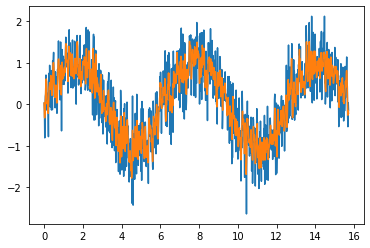

In [2]:
# las siguientes 3 lineas generan un conjunto de datos que se comportan segun una onda senoidal pero tienen
# ruido por lo cual vamos a suavizar usando promedio de 3 puntos
# en este ejercicio los generamos manualmente pero pensemos que son datos que pudieron ser generados con algún
# instrumento como un sensor, o bien estar almacenados en una base de datos
sample_points = 1000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()
ys = (y[:-2] + y[1:-1] + y[2:]) / 3
ys = np.insert(ys,0,y[0])
ys = np.insert(ys,-1,y[-1])

plt.plot(x,y)
plt.plot(x,ys)
plt.show()


Ejercicio Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5 , 0.31127812]

Nota: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

S=−∑inP(xi)log2P(xi)

In [3]:
# tu codigo aqui (~ 4 lineas de codigo)
def Entropia(x):
    return x * np.log2(x) *-1
x = np.array([0.25,0.75])
y = Entropia(x)
print(y)

[0.5        0.31127812]


Ejercicio : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
c(x)=(x2+x+log(0.0001x)−0.54x−−−−−√)/100

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función ganancia_neta(x,g,c) donde:

    x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
    g = función que estima la ganancia en función de x
    c = función que estima el costo en función de x

La función realiza el calculo simple g(x) - c(x) , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.


In [4]:
def ganancia2(x):
  return np.power(x,2)

def costos(x):
  return (np.power(x,2) + x + np.log(0.0001*x)-np.sqrt(0.54*x))/100

def ganancia_neta(x,g,c):
  return g(x) - c(x)

x = np.array([1,2,3,4,5,6,7,8,9])
ganancia_neta(x,ganancia2,costos)

array([ 1.07945187,  4.03556424,  8.9738452 , 15.8929374 , 24.7924407 ,
       35.67218581, 48.53208652, 63.3720936 , 80.19217657])

Ejemplo aplicado En un datawarehouse se tiene un modelo "lifetime value" en el que se almacena de manera acumulativa cuantas ganancias se han percibido a lo largo de la vida de los usuarios, un ETL en Python debe calcularlo en función de un vector que contiene de manera ordenada en el tiempo los ingresos percibidos mensualmente para cierto usuario. Podemos usar la funcion np.cumsum para esto, en este ejercicio necesitamos determinar el "lifetime value" de cierto usuario en su 6to mes:

In [5]:
def lifetime_value(ganancias_mensuales):
    ## tu codigo aqui(~ 1 linea de codigo):
    return np.cumsum(ganancias_mensuales,dtype=float)

# Prueba:
ganancias_usuario = np.array([25,150,125,75,100,45,22,30])
lifetime_value_usuario = lifetime_value(ganancias_usuario)

print("Lifetime value:",lifetime_value_usuario)

print("El valor del usuario a su sexto mes es :",lifetime_value_usuario[5])

Lifetime value: [ 25. 175. 300. 375. 475. 520. 542. 572.]
El valor del usuario a su sexto mes es : 520.0


Ejercicio Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

tip investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.


In [6]:
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    valor, conteo = np.unique(x, return_counts=True)
    mayor = np.argmax(conteo)
    return valor[mayor], conteo[mayor]


x = np.array([1,2,3,4,5,6,2,4,5,6,1,2,2])
print(mode(x))

(2, 4)


**Ejercicio** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [7]:
def Entropia(x):
    return x * np.log2(x) *-1
x = np.array([0.25,0.75])
y = np.sum(Entropia(x))
print(y)

0.8112781244591328


**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [8]:
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 lineas de codigo)
    return np.ma.masked_invalid(Y * np.log(Y_hat)).sum()
    

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1]) # <- resultado de algun modelo predictivo

cross_entropy(y,y_hat)

-0.35667494393873245

ejercicio : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [9]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.sum(np.power(x,2)) # raiz cuadrada

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #

print(magnitud(errores_modelo1))
print(magnitud(errores_modelo2))

# elegir el mejor modelo con una condicional(if)
if(magnitud(errores_modelo1)> magnitud(errores_modelo2)):
  print("Mejor modelo: errores_modelo2")
else:
  print("Mejor modelo: errores_modelo1")

10
6
Mejor modelo: errores_modelo2


ejercicio Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [10]:
def normalizar(x):
  return x / np.sum(np.power(x,2))

print(normalizar(errores_modelo1))
errores_modelo1 = normalizar(errores_modelo1)
print(magnitud(errores_modelo1))
if(magnitud(errores_modelo1)> magnitud(errores_modelo2)):
  print("Mejor modelo: errores_modelo2")
else:
  print("Mejor modelo: errores_modelo1")

[0.1 0.2 0.1 0.2]
0.10000000000000002
Mejor modelo: errores_modelo1


**Ejercicio aplicado en DS**
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [11]:
# Aplicar la red neuronal sobre los siguientes datos X

HL1 = [0.25,0.37]
HL2 = [-8,14]
OL = [4,9]

def neural_network(x):
  dotHidden1 = x.dot(HL1)
  dotHidden2 = x.dot(HL2)
  if(dotHidden1>dotHidden2):
    return np.array([dotHidden1,dotHidden2]).dot(OL),HL1
  elif(dotHidden2>dotHidden1):
    return np.array([dotHidden1,dotHidden2]).dot(OL),HL2
  else:
    return dotHidden1,dotHidden2


X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
X4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])

print(neural_network(X1))
print(neural_network(X2))
print(neural_network(X3))
print(neural_network(X4))
print(neural_network(X5))





(56.2856, [-8, 14])
(1176.36, [-8, 14])
(0.0, 0)
(56.48, [-8, 14])
(278.86127348050127, [-8, 14])


Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X **La neurona número dos [-8,14]**
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida **El vector X2**


**Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

3 0.9143561929336923


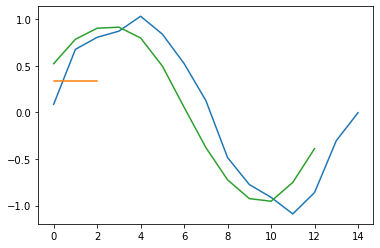

In [12]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) 
y = np.sin(x) + ruido

filtro = np.array([1/3,1/3,1/3]) #para lograr las medias moviles a traves de correlacion cruzada

## tu codigo aqui (~ 3 linea de codigo)
ys = []
for n in range(1,len(y)-1): #5
    ys.append(np.array([y[n-1],y[n],y[n+1]]).dot(filtro))


print(np.argmax(ys), np.max(ys))
plt.plot(y)
plt.plot(filtro)
plt.plot(ys)
plt.show()



Ejercicio dado el vector x, usar operadores lógicos sobre vectores y acceso a elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

nota No se puede usar np.abs() ni ciclos

tip usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1


In [13]:
x = np.linspace(-2,2,9)


## tu codigo aqui (~ 4 linea de codigo)
### ver cuales elementos son negativos <- vector booleanos
### multiplicar esos elementos por -1
### usando el vector del rpimer paso remplazar los que eran negativos por su valor calculado en paso 2
y = x[x<0]
x = x[x>=0]
y = y *-1
print(np.hstack((y,x)))




[2.  1.5 1.  0.5 0.  0.5 1.  1.5 2. ]


**ejercicio** Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x

**nota** debe ser implementada sin ciclos o ifs 

In [14]:
def h(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    x = x[x>=0]
    x = x[x<=1]
    return x

x = np.array([0.1,-2,0.5,5])
x1 = x>=0
x2 = x<=1
x[x1]
print(x)
print(h(x))

[ 0.1 -2.   0.5  5. ]
[0.1 0.5]


**Ejercicio**

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$



In [15]:
x = np.linspace(-1,5,10)
condiciones = [x<0,np.logical_and(x>=0, x<1),np.logical_and(x>=1, x<2)]
resultados =  [-1*x,x**3,x**2]
k = np.select(condiciones,resultados,4)

print(x)
print(k)

[-1.         -0.33333333  0.33333333  1.          1.66666667  2.33333333
  3.          3.66666667  4.33333333  5.        ]
[1.         0.33333333 0.03703704 1.         2.77777778 4.
 4.         4.         4.         4.        ]


##### Select y performance
Aun que select es muy conveniente y útil , no es la opción mas eficiente esto debido a que evalua todas las condiciones y todos los resultados, en programación en general buscamos escribir los programas de la manera mas eficiente posible y evitar calculos innecesarios, esto se vuelve vital en ciencia de datos cuando procesamos grandes volúmenes de información, por eso NumPy nos provee la alternativa a select llamada **piecewise** que funciona de manera similar .


Este funciona similar a select pero en vez de calcular todos los posibles resultados, calcula solo aquellos para los que la condición es True e ignora los False,sintácticamente piecewise requiere que los "resultados" sesan calcuados usando una lista de funciones por lo cual todos los resultados deben estar contenidos en una función  y el objeto función ser enviado a piecewise (si la función solo se utiliza una vez para este propósito, se puede usar funciones anónimas o lambda).

**Ejercicio** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x>=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

In [16]:
x = np.linspace(-1,5,10)
k = np.piecewise(x,[x<0,np.logical_and(x>=0, x<1),np.logical_and(x>=1, x<2),x>4],[lambda x: x*-1,lambda x: x**3,lambda x: x**2,4])
print(k)

[1.         0.33333333 0.03703704 1.         2.77777778 0.
 0.         0.         4.         4.        ]


In [17]:
x = np.linspace(-1,5,10)
k = np.piecewise(x,[x<0,np.logical_and(x>=0, x<1),x>=1],[lambda x: np.e**(2*x),1,lambda x: np.e**(1-x)])
print(k)

[0.13533528 0.51341712 1.         1.         0.51341712 0.26359714
 0.13533528 0.06948345 0.03567399 0.01831564]


#### Investigar

* Proyección vectorial
    * Definir una función para calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo, tip: Hay un algoritmo de ML cuyo nombre puede ser  útil.
* Producto cruz
    * calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo

#Proyección de un vector sobre otro vector

Si tenemos gráficamente los vectores

<img src=https://ekuatio.com/wp-content/uploads/proyeccion-vectores-1.png>

Para calcular la proyeccción de u sobre v es necesario trazar una recta desde el extremo de u hacia el vector v

<img src=https://ekuatio.com/wp-content/uploads/proyeccion-vectores-2.png>

Luego se traza un vector desde el origen de ambos vectores hasta el punto donde se cortan con la recta perpendiuclar y el vector v, el vector resultante es el vector proyección de u sobre v.

<img src=https://ekuatio.com/wp-content/uploads/proyeccion-vectores-3.png>

Si el ángulo entre los vectores es obtuso se realiza de la siguiente forma

<img src=https://ekuatio.com/wp-content/uploads/proyeccion-vectores-7.png>

La fórmula para el cálculo del vector proyección esta dada por

<img src=https://ekuatio.com/wp-content/uploads/proyeccion-vectores-23.png>

[ 0 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


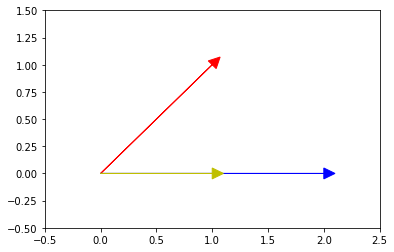

In [18]:
def proyeccionVectorial(x,y):
  dot = x.dot(y)
  modulo = np.sqrt(np.sum(np.square(y)))**2
  return dot/modulo * y

xtick = np.linspace(0,10,2,dtype=int)
print(xtick)

x=np.array([1,1])
y=np.array([2,0])
z=proyeccionVectorial(x,y)
plt.arrow(0,0,x[0],x[1],head_width=0.1,head_length=0.1, color="R")
plt.arrow(0,0,y[0],y[1],head_width=0.1,head_length=0.1, color="B")
plt.arrow(0,0,z[0],z[1],head_width=0.1,head_length=0.1, color="Y")
plt.axis([-0.5, 2.5, -0.5, 1.5])
plt.show()


#Producto cruz
Es una operación binaria entre dos vectores en un espacio tridimensional. El resultado es un vector perpendicular a los vectores que se multiplican, y por lo tanto normal al plano que los contiene. 

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Cross_product_parallelogram.svg/220px-Cross_product_parallelogram.svg.png>

-4


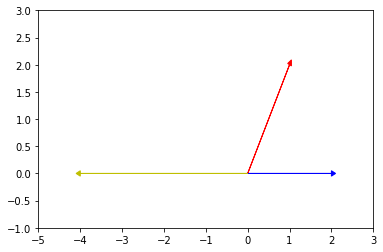

In [19]:
x=np.array([1,2])
y=np.array([2,0])
z=np.cross(x,y)
print(z)
plt.arrow(0,0,x[0],x[1],head_width=0.1,head_length=0.1, color="R")
plt.arrow(0,0,y[0],y[1],head_width=0.1,head_length=0.1, color="B")
plt.arrow(0,0,z,0,head_width=0.1,head_length=0.1, color="Y")
plt.axis([-5, 3, -1, 3])
plt.show()